<center><b>Visualizing the Time Distribution of Missiles on Israel from the Gaza Strip</b></center>

In this project, I am visualizing the time distribution of missiles fired at Israel in several ways:

1. Distinguishing between towns close to the strip ("Otef") and the rest of Israel.
2. Visualizing in two ways: (i) Along the day (24h) and (ii) Along the hour (60min), regardless of the hour of the day.
3. Conducting linear regression analysis of the number of rockets fired, considering ground operations.

---
The data is based on the database of Yuval Harpaz &copy; from his [Github repository](https://github.com/yuval-harpaz/alarms/raw/master/data/alarms.csv). <br>
<b>Thank you!</b>


---

First, I've imported the necessary packages and downloaded the latest database from GitHub to the local host. I've implemented a check to verify whether the database is still online. If not, we'll use the last downloaded version.

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [120]:
data_url = r"https://github.com/yuval-harpaz/alarms/raw/master/data/alarms.csv"
file_name = os.path.basename(data_url)

try:
    df = pd.read_csv(data_url, encoding='utf-8')
    df.to_csv(os.path.basename(data_url), index=False)
except Exception:
    df = pd.read_csv(file_name, encoding='utf-8')

Filtering the database for the ongoing Gaza war, focusing on missiles fired since the massacre day on October 7th, 2023, originating from Gaza:

In [121]:
df["time"] = pd.to_datetime(df["time"])
filtered_df = df[df["time"].dt.date >= pd.to_datetime("2023-10-07").date()]
filtered_df = filtered_df[filtered_df["origin"] == "Gaza"]

Including a distinction between border towns ("Otef") near Gaza and the remainder of Israel:

In [122]:
close_cities = ["אבשלום","אור הנר","איבים","ארז","בארי","גבים","גברעם","דקל","זיקים","זמרת","חולית","יבול","יד מרדכי","יכיני","ישע","יתד","כיסופים","כפר מימון","כפר עזה","כרם שלום","כרמיה","מבטחים","מגן","מפלסים","נחל עוז","ניר יצחק","ניר עוז","ניר עם","נירים","נתיב העשרה","סופה","סעד","עין הבשור","עין השלושה","עלומים","עמיעוז","פרי גן","רעים","שדי אברהם","שדרות","שובה","שוקדה","שלומית","תושיה","תלמי יוסף","תקומה"
]

filtered_df['is_close'] = filtered_df['cities'].apply(lambda x: x in close_cities)

Converting day times into numbers for better launch distribution visualization.
<br>
For example, 2:45PM becomes 14.8, 4:31AM becomes 4.5.

In [123]:
filtered_df['time_as_integer'] = filtered_df['time'].dt.hour + filtered_df['time'].dt.minute / 60
filtered_df["time_as_integer"] = filtered_df['time_as_integer'].round(1)

Visualizing the distribution of rocket launches throughout the day in different areas (all of Israel, Otef, and the rest of Israel), starting from the first attack on October 7th.
<br>
The histograms display bars for every 15-minute interval, with the rounded hours highlighted in gray.

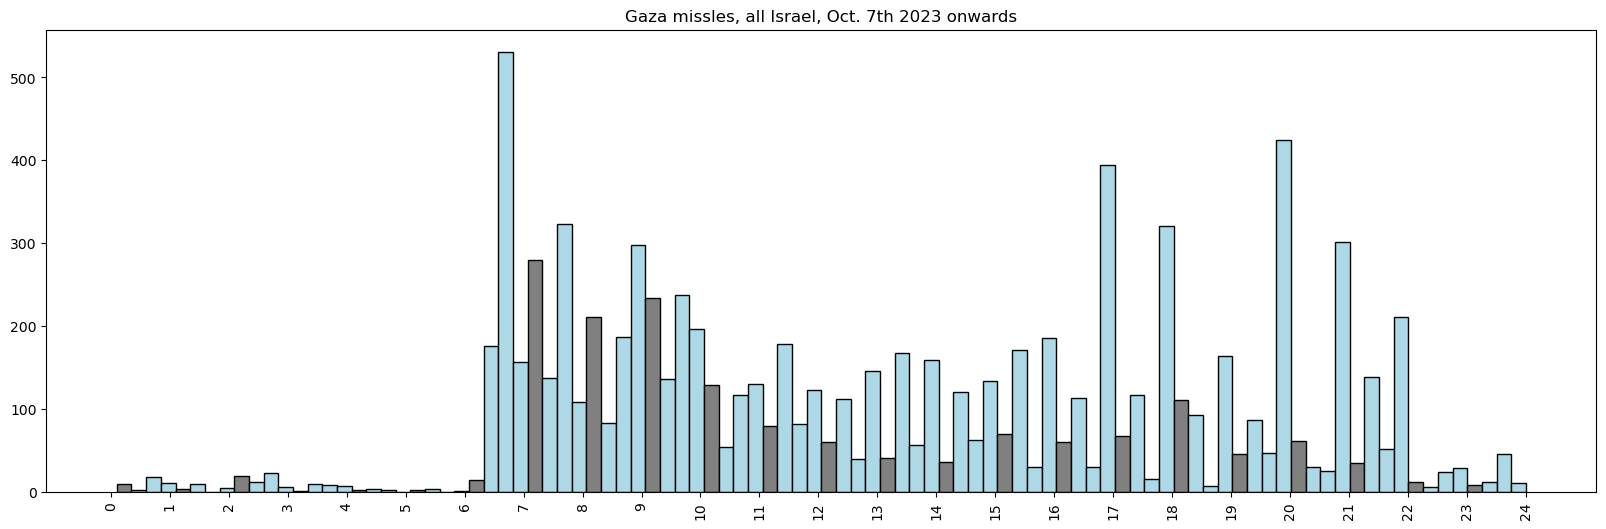

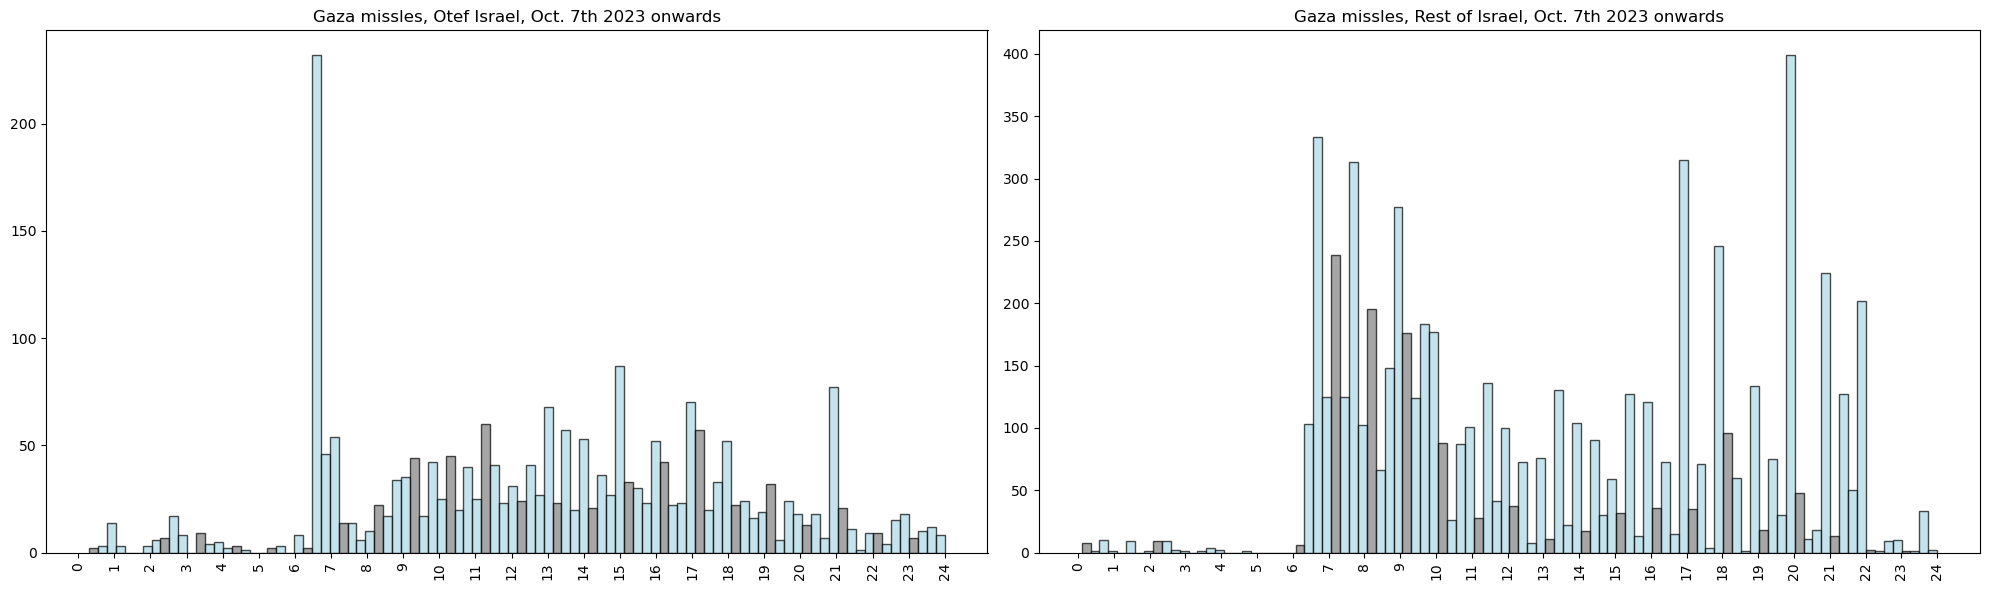

20.0 hours is time with most number of rockets fired at Israel, with 400 rockets


In [124]:
fig, ax = plt.subplots(figsize=(20,6))

# all israel
n, bins, patches = ax.hist(filtered_df["time_as_integer"], bins=96, color='lightblue', edgecolor='black')
ax.set_title("Gaza missles, all Israel, Oct. 7th 2023 onwards")
ticks = np.arange(0, 25, step=1)
ax.set_xticks(ticks)
ax.set_xticklabels(ticks, rotation=90)
for i, bar in enumerate(patches):
    if i % 4 == 0: 
        bar.set_fc('gray')

plt.savefig(r"C:\Users\eyalm\OneDrive\מסמכים\Gaza\plot_1_all_israel_by_hour_oct7.jpg")
plt.show()


fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# otef
close_cities_true = filtered_df['is_close'] == True
n, bins, patches = axs[0].hist(filtered_df["time_as_integer"][close_cities_true], bins=96, color='lightblue', edgecolor='black', alpha=0.7, label='Close Cities (True)')
axs[0].set_title("Gaza missles, Otef Israel, Oct. 7th 2023 onwards")
ticks = np.arange(0, 25, step=1)
axs[0].set_xticks(ticks)
axs[0].set_xticklabels(ticks, rotation=90)
for i, bar in enumerate(patches):
    if i % 4 == 0: 
        bar.set_fc('gray')

# not otef
close_cities_false = filtered_df['is_close'] == False
n, bins, patches = axs[1].hist(filtered_df["time_as_integer"][close_cities_false], bins=96, color='lightblue', edgecolor='black', alpha=0.7, label='Close Cities (True)')
axs[1].set_title("Gaza missles, Rest of Israel, Oct. 7th 2023 onwards")
ticks = np.arange(0, 25, step=1)
axs[1].set_xticks(ticks)
axs[1].set_xticklabels(ticks, rotation=90)
for i, bar in enumerate(patches):
    if i % 4 == 0: 
        bar.set_fc('gray')

plt.tight_layout()

plt.savefig(r"C:\Users\eyalm\OneDrive\מסמכים\Gaza\plot_2_portions_israel_by_hour_oct7.jpg")
plt.show()

time_count = filtered_df['time_as_integer'].value_counts()
max_msl_lauches = time_count.max()
max_msl_time = time_count[time_count == max_msl_lauches]
print( max_msl_time.index[0], "hours is time with most number of rockets fired at Israel, with", max_msl_lauches, "rockets")

<b>Conclution:</b><br>
The initial attack on October 7th was far more extensive than the others during the war.
<br>
Therefore, in further analysis, I will distinguish the data with and without October 7th in order to identify trends.

---

#### Without October 7th:

In [125]:
filtered_df2 = filtered_df[filtered_df["time"].dt.date > pd.to_datetime("2023-10-07").date()]

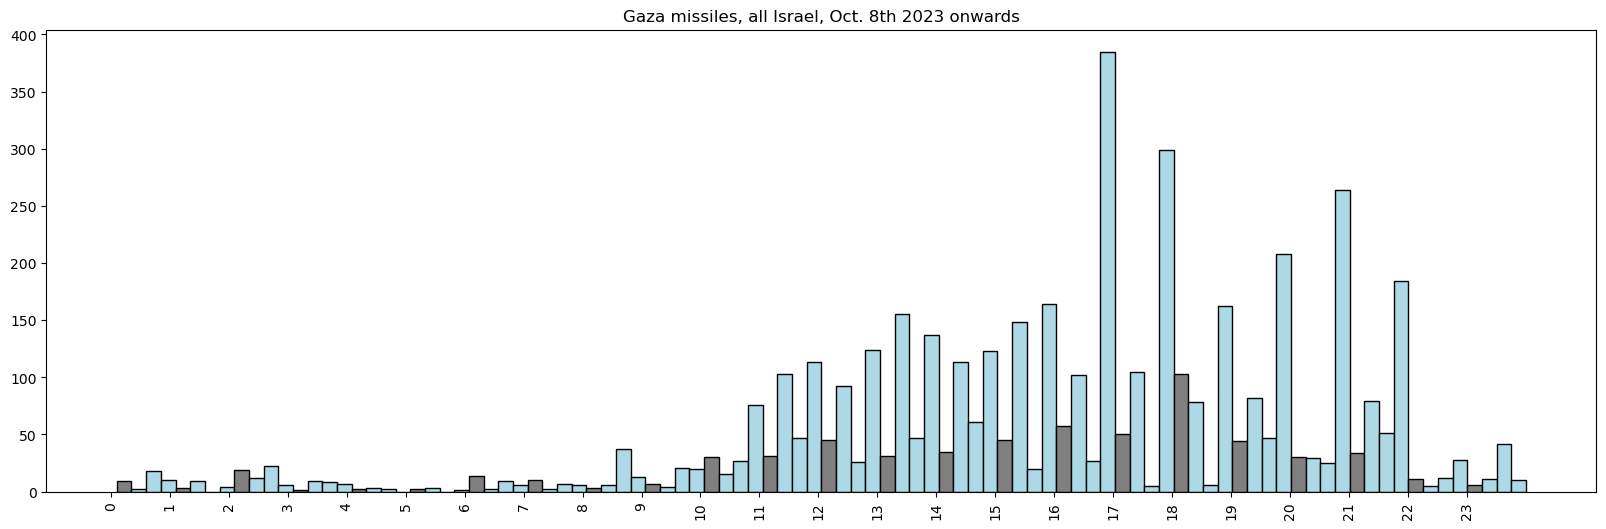

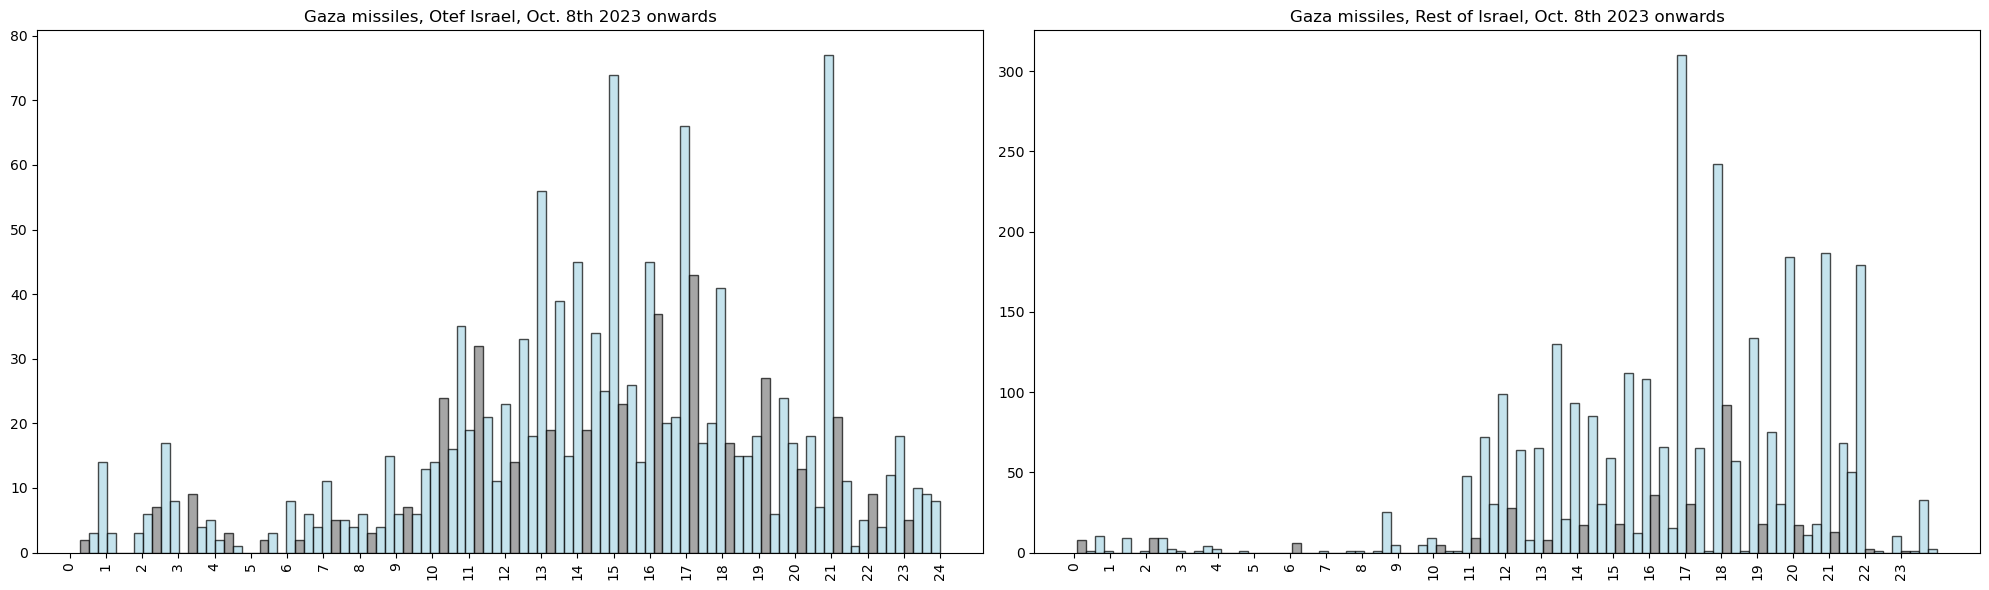

17.0 hours is the time with the most number of rockets fired at Israel: 323


In [126]:
fig, ax = plt.subplots(figsize=(20,6))

# all israel
n, bins, patches = ax.hist(filtered_df2["time_as_integer"], bins=96, color='lightblue', edgecolor='black')
ax.set_title("Gaza missiles, all Israel, Oct. 8th 2023 onwards")
ticks = np.arange(0, 24, step=1)
ax.set_xticks(ticks)
ax.set_xticklabels(ticks, rotation=90)
for i, bar in enumerate(patches):
    if i % 4 == 0: 
        bar.set_fc('gray')

plt.savefig(r"C:\Users\eyalm\OneDrive\מסמכים\Gaza\plot_3_all_israel_by_hour_oct8.jpg")
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# otef
close_cities_true = filtered_df2['is_close'] == True
n, bins, patches = axs[0].hist(filtered_df2["time_as_integer"][close_cities_true], bins=96, color='lightblue', edgecolor='black', alpha=0.7, label='Close Cities (True)')
axs[0].set_title("Gaza missiles, Otef Israel, Oct. 8th 2023 onwards")
ticks = np.arange(0, 25, step=1)
axs[0].set_xticks(ticks)
axs[0].set_xticklabels(ticks, rotation=90)
for i, bar in enumerate(patches):
    if i % 4 == 0: 
        bar.set_fc('gray')

# not otef
close_cities_false = filtered_df2['is_close'] == False
n, bins, patches = axs[1].hist(filtered_df2["time_as_integer"][close_cities_false], bins=96, color='lightblue', edgecolor='black', alpha=0.7, label='Close Cities (True)')
axs[1].set_title("Gaza missiles, Rest of Israel, Oct. 8th 2023 onwards")
ticks = np.arange(0, 24, step=1)
axs[1].set_xticks(ticks)
axs[1].set_xticklabels(ticks, rotation=90)
for i, bar in enumerate(patches):
    if i % 4 == 0: 
        bar.set_fc('gray')

plt.tight_layout()
plt.savefig(r"C:\Users\eyalm\OneDrive\מסמכים\Gaza\plot_4_portions_israel_by_hour_oct8.jpg")
plt.show()

time_count = filtered_df2['time_as_integer'].value_counts()
max_msl_launches = time_count.max()
max_msl_time = time_count[time_count == max_msl_launches]
print(max_msl_time.index[0], "hours is the time with the most number of rockets fired at Israel:", max_msl_launches)


<b>Conclution:</b><br>
As demonstrated above, it is observable that longer-range missiles fired at Israel are predominantly launched at round hours and in the evening. According to reports, this pattern is attributed to the use of timers set to round-hour intervals for these rockets.<br>
On the contrary, rockets targeting the Otef, which are shorter-ranged and fired more sporadically, tend to be launched whenever the terrorists find an opportunity, resulting in a wider distribution across different times of the day.
<br>
The overall plot for Israel indicates that the cumulative count of longer-range rockets is more frequent, thereby skewing the overall distribution toward the evening hours.

---

I've adjusted the view to display the in-hour distribution with increased resolution using 5-minute intervals:

In [127]:
filtered_df_minutes = filtered_df
filtered_df_minutes["5_minute"] = (filtered_df["time"].dt.minute + 2) // 5 * 5 

In [128]:
filtered_df_minutes_start_day = filtered_df_minutes[filtered_df_minutes['time'].dt.date >= pd.to_datetime("2023-10-07").date()]
close_cities_true = []
close_cities_true = filtered_df_minutes_start_day['is_close'] == True

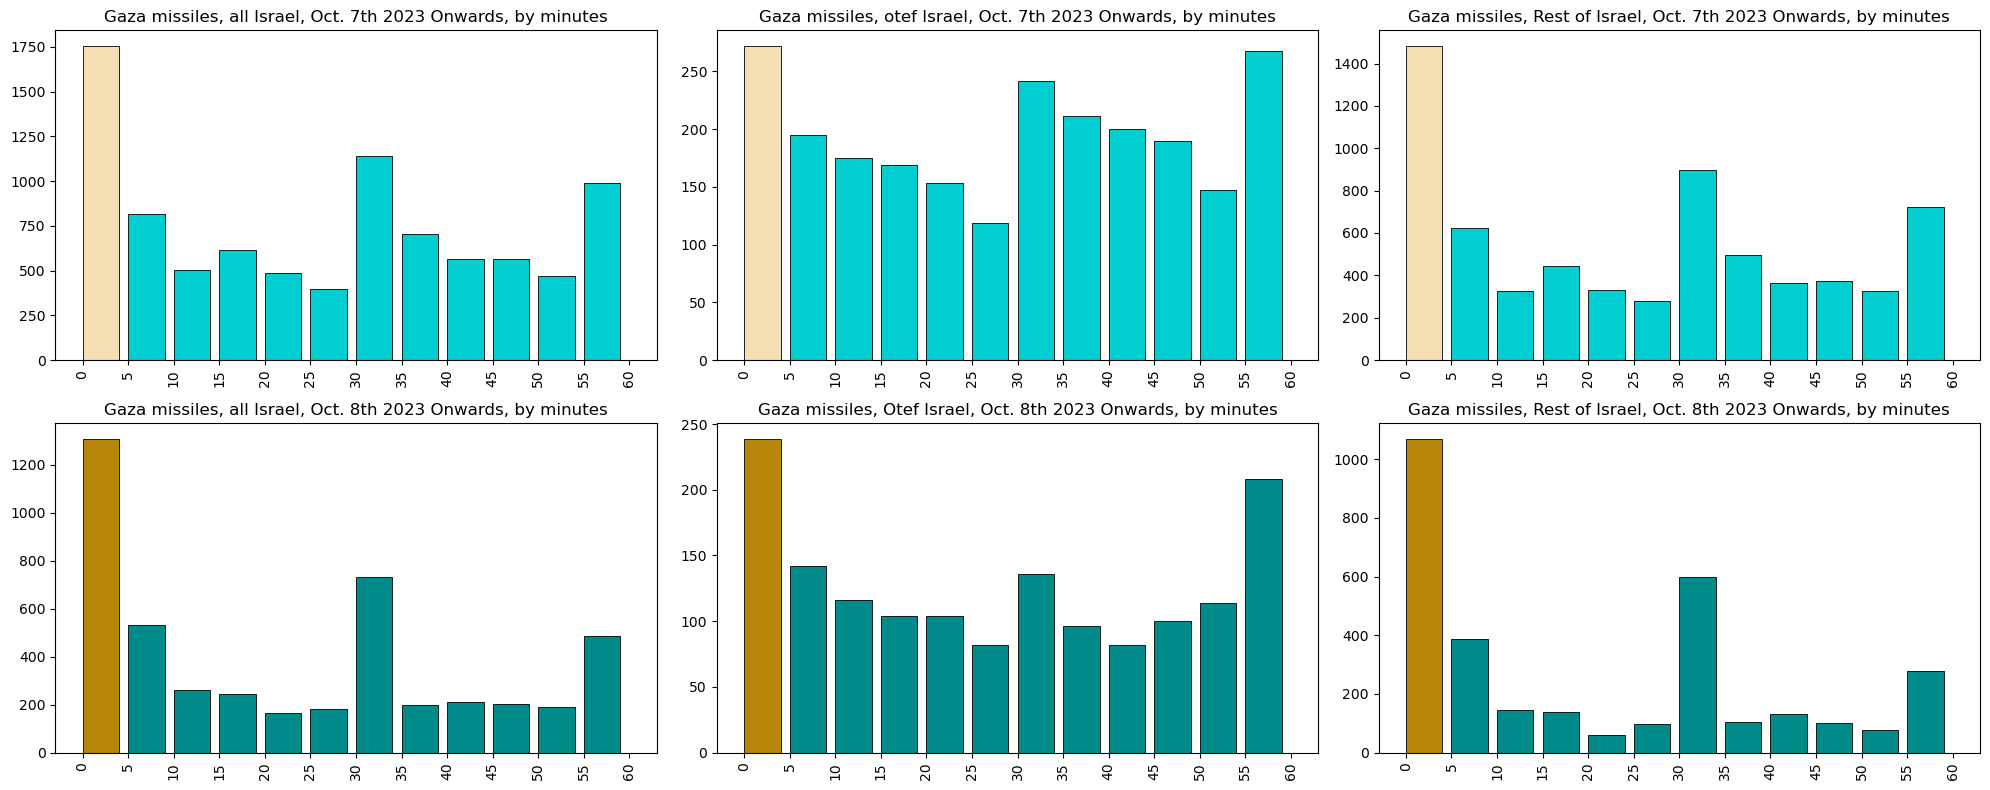

In [129]:
filtered_df_minutes_start_day = filtered_df_minutes[filtered_df_minutes['time'].dt.date >= pd.to_datetime("2023-10-07").date()]

fig, axs = plt.subplots(2, 3, figsize=(20, 8))

    # Including Oct. 7th:

# all israel
n, bins, patches = axs[0, 0].hist(filtered_df_minutes_start_day["5_minute"], bins=12, color='darkturquoise',width=4, linewidth=0.6, edgecolor='black')
axs[0, 0].set_title("Gaza missiles, all Israel, Oct. 7th 2023 Onwards, by minutes")
ticks = np.arange(0, 65, step=5)
plt.sca(axs[0, 0])  
plt.xticks(ticks, rotation=90)
patches[0].set_fc('wheat')

# otef israel
close_cities_true_first = filtered_df_minutes_start_day[filtered_df_minutes_start_day['is_close'] == True]
n, bins, patches = axs[0, 1].hist(close_cities_true_first["5_minute"], bins=12, color='darkturquoise',width=4, linewidth=0.6, edgecolor='black')
axs[0, 1].set_title("Gaza missiles, otef Israel, Oct. 7th 2023 Onwards, by minutes")
plt.sca(axs[0, 1]) 
plt.xticks(ticks, rotation=90)
patches[0].set_fc('wheat')

# rest of israel
close_cities_false_first = filtered_df_minutes_start_day[filtered_df_minutes_start_day['is_close'] == False]
n, bins, patches = axs[0, 2].hist(close_cities_false_first["5_minute"], bins=12, color='darkturquoise',width=4, linewidth=0.6, edgecolor='black')
axs[0, 2].set_title("Gaza missiles, Rest of Israel, Oct. 7th 2023 Onwards, by minutes")
plt.sca(axs[0, 2]) 
plt.xticks(ticks, rotation=90)
patches[0].set_fc('wheat')

    # Not Including Oct. 7th:
    
# all israel
filtered_df_minutes_next_day = filtered_df_minutes[filtered_df_minutes['time'].dt.date > pd.to_datetime("2023-10-07").date()]
n, bins, patches = axs[1, 0].hist(filtered_df_minutes_next_day["5_minute"], bins=12, color='darkcyan',width=4, linewidth=0.6, edgecolor='black')
axs[1, 0].set_title("Gaza missiles, all Israel, Oct. 8th 2023 Onwards, by minutes")
ticks = np.arange(0, 65, step=5)
plt.sca(axs[1, 0])  
plt.xticks(ticks, rotation=90)
patches[0].set_fc('darkgoldenrod')

# otef israel
close_cities_true_next = filtered_df_minutes_next_day[filtered_df_minutes_next_day['is_close'] == True]
n, bins, patches = axs[1, 1].hist(close_cities_true_next["5_minute"], bins=12, color='darkcyan',width=4, linewidth=0.6, edgecolor='black')
axs[1, 1].set_title("Gaza missiles, Otef Israel, Oct. 8th 2023 Onwards, by minutes")
ticks = np.arange(0, 65, step=5)
plt.sca(axs[1, 1])  
plt.xticks(ticks, rotation=90)
patches[0].set_fc('darkgoldenrod')

# rest of israel
close_cities_false_next = filtered_df_minutes_next_day[filtered_df_minutes_next_day['is_close'] == False]
n, bins, patches = axs[1, 2].hist(close_cities_false_next["5_minute"], bins=12, color='darkcyan',width=4, linewidth=0.6, edgecolor='black')
axs[1, 2].set_title("Gaza missiles, Rest of Israel, Oct. 8th 2023 Onwards, by minutes")
ticks = np.arange(0, 65, step=5)
plt.sca(axs[1, 2])  
plt.xticks(ticks, rotation=90)
patches[0].set_fc('darkgoldenrod')


plt.tight_layout()
plt.savefig(r"C:\Users\eyalm\OneDrive\מסמכים\Gaza\plot_5_all_plots_by_minutes.jpg")
plt.show()

<b>Conclusion:</b>
As depicted in the hourly distribution, there is a noticeable trend in the rest of Israel, indicating that missiles are fired at either round hours or half-past the hour.<br>
This trend is also present in the Otef area, although the distribution is less distinct. However, the overall trend across the country remains clear.

---

<b>The next figure will visuallize the effectivness of the war:</b> <br>
(a) The number of rockets fired at Israel (Otef, rest of Israel, and total) as the war progresses.<br>
(b) A linear regression analysis of the total number of rockets.<br>
(c) Light gray lines marking Sundays to facilitate the observation of passing weeks.<br>
(d) An indicator denoting the commencement of the ground operation on October 27th.

In [130]:
date_counts = filtered_df['time'].dt.date.value_counts().sort_index()
date_counts = pd.DataFrame(date_counts)
otef_counts = filtered_df[filtered_df['is_close'] == True]['time'].dt.date.value_counts().sort_index()
rest_of_israel_counts = filtered_df[filtered_df['is_close'] == False]['time'].dt.date.value_counts().sort_index()

date_counts['Otef'] = otef_counts
date_counts['Rest_of_Israel'] = rest_of_israel_counts
date_counts = date_counts.rename(columns={'time': 'Total'})
date_counts = date_counts.fillna(0)

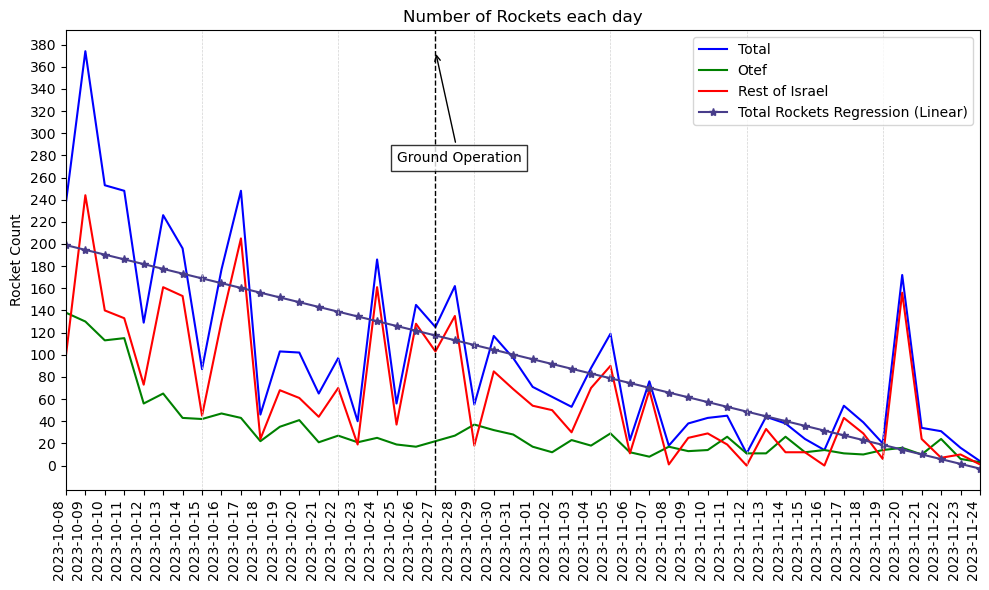

In [131]:
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))

date_counts.index = pd.to_datetime(date_counts.index)
date_count_next_day = date_counts.loc[date_counts.index > "2023-10-07"].copy()
date_count_next_day['Total'].plot(color='blue', label='Total')
date_count_next_day['Otef'].plot(color='green', label='Otef')
date_count_next_day['Rest_of_Israel'].plot(color='red', label='Rest of Israel')
date_count_next_day['date'] = pd.to_datetime(date_count_next_day.index)
date_count_next_day.loc[: ,'day'] = date_count_next_day['date'].dt.day_name()


x = np.array(range(len(date_count_next_day))).reshape(-1, 1)
y = date_count_next_day['Total'].values.reshape(-1, 1)
reg = LinearRegression().fit(x, y)
y_pred = reg.predict(x)
plt.plot(date_count_next_day.index, y_pred, color='darkslateblue', label='Total Rockets Regression (Linear)', marker='*')

dates = pd.to_datetime(date_count_next_day.index).values
ax = plt.gca()

plt.title('Number of Rockets each day')
plt.ylabel('Rocket Count')
plt.legend()

ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate(rotation=90)

max_value = date_count_next_day[['Total', 'Otef', 'Rest_of_Israel']].max().max()
plt.yticks(range(0, int(max_value) + 10, 20))
plt.tight_layout()

sundays = date_count_next_day[date_count_next_day['day'] == 'Sunday'].index
for sunday in sundays:
    plt.axvline(x=sunday, color='lightgray', linestyle='--', linewidth=0.5)
    for label in ax.get_xticklabels():
        if pd.to_datetime(label.get_text()).day_name() == 'Sunday' and label.get_text() == str(sunday):
            label.set_fontweight('bold')


ground_op = pd.Timestamp("2023-10-27")
plt.axvline(x=ground_op, color='black', linestyle='--', linewidth=1)
plt.annotate('Ground Operation', xy=(ground_op, max_value), xytext=(ground_op -  pd.Timedelta(days=2), max_value - 100), fontsize=10,
             arrowprops=dict(facecolor='black', arrowstyle='->'), bbox=dict(facecolor='white', alpha=0.8))

            
plt.savefig(r"C:\Users\eyalm\OneDrive\מסמכים\Gaza\plot_6_dated_regression.jpg")
plt.show()

<b>Conclution:</b>
* As demonstrated above, there's a noticeable trend of fewer rockets being fired across all areas.
* The Otef area experienced heavy missile fire during the initial week, with the daily rocket count remaining relatively constant thereafter. However, in the rest of Israel, there is a declining trend in rocket launches with occasional peaks.
* The days of the week do not seem to have an impact on the number of rockets fired.
* The ground operation appears not to significantly affect rocket firings.
    
---
    
To further analyze the effect of the ground operations, I've divided the plot into two groups: before and after the ground operation:

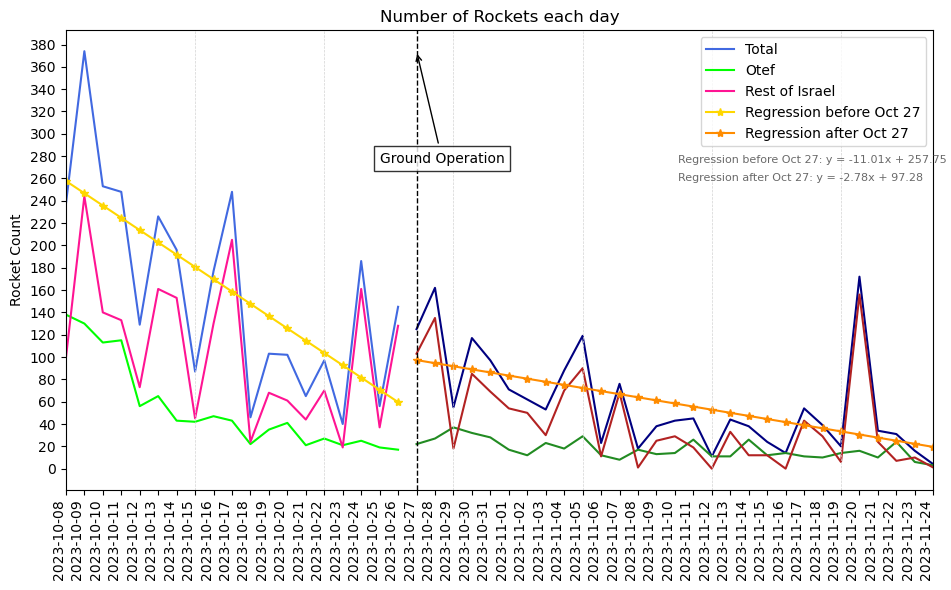

In [132]:
plt.figure(figsize=(10, 6))

date_counts.index = pd.to_datetime(date_counts.index)
date_count_next_day = date_counts.loc[date_counts.index > "2023-10-07"].copy()
date_count_next_day['date'] = pd.to_datetime(date_count_next_day.index)
date_count_next_day.loc[: ,'day'] = date_count_next_day['date'].dt.day_name()

data_before_oct_27 = date_count_next_day[date_count_next_day.index < "2023-10-27"]
data_after_oct_27 = date_count_next_day[date_count_next_day.index >= "2023-10-27"]

data_before_oct_27['Total'].plot(color='royalblue', label='Total')
data_after_oct_27['Total'].plot(color='navy', label='_nolegend_')
data_before_oct_27['Otef'].plot(color='lime', label='Otef')
data_after_oct_27['Otef'].plot(color='forestgreen', label='_nolegend_')
data_before_oct_27['Rest_of_Israel'].plot(color='deeppink', label='Rest of Israel')
data_after_oct_27['Rest_of_Israel'].plot(color='firebrick', label='_nolegend_')


x_before = np.array(range(len(data_before_oct_27))).reshape(-1, 1)
y_before = data_before_oct_27['Total'].values.reshape(-1, 1)
reg_before = LinearRegression().fit(x_before, y_before)
y_pred_before = reg_before.predict(x_before)
x_after = np.array(range(len(data_after_oct_27))).reshape(-1, 1)
y_after = data_after_oct_27['Total'].values.reshape(-1, 1)
reg_after = LinearRegression().fit(x_after, y_after)
y_pred_after = reg_after.predict(x_after)

plt.plot(data_before_oct_27.index, y_pred_before, color='gold', label='Regression before Oct 27', marker='*')
plt.plot(data_after_oct_27.index, y_pred_after, color='darkorange', label='Regression after Oct 27', marker='*')

legend_x = 0.664  # Adjust the x position of the legend
legend_y = 0.7  # Adjust the y position of the legend
plt.legend(loc='upper left')

if reg_before and reg_after:
    plt.text(legend_x, legend_y, f'Regression before Oct 27: y = {reg_before.coef_[0][0]:.2f}x + {reg_before.intercept_[0]:.2f}',
             fontsize=8, color='dimgray', transform=ax.transAxes)
    plt.text(legend_x, legend_y - 0.04, f'Regression after Oct 27: y = {reg_after.coef_[0][0]:.2f}x + {reg_after.intercept_[0]:.2f}',
             fontsize=8, color='dimgray', transform=ax.transAxes)

dates = pd.to_datetime(date_count_next_day.index).values
ax = plt.gca()

plt.title('Number of Rockets each day')
plt.ylabel('Rocket Count')
plt.legend()

ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate(rotation=90)

max_value = date_count_next_day[['Total', 'Otef', 'Rest_of_Israel']].max().max()
plt.yticks(range(0, int(max_value) + 10, 20))
plt.tight_layout()

sundays = date_count_next_day[date_count_next_day['day'] == 'Sunday'].index
for sunday in sundays:
    plt.axvline(x=sunday, color='lightgray', linestyle='--', linewidth=0.5)
    for label in ax.get_xticklabels():
        if pd.to_datetime(label.get_text()).day_name() == 'Sunday' and label.get_text() == str(sunday):
            label.set_fontweight('bold')
            
ground_op = pd.Timestamp("2023-10-27")
plt.axvline(x=ground_op, color='black', linestyle='--', linewidth=1)
plt.annotate('Ground Operation', xy=(ground_op, max_value), xytext=(ground_op -  pd.Timedelta(days=2), max_value - 100), fontsize=10,
             arrowprops=dict(facecolor='black', arrowstyle='->'), bbox=dict(facecolor='white', alpha=0.8))

            
plt.savefig(r"C:\Users\eyalm\OneDrive\מסמכים\Gaza\plot_7_dated_regression_groud_op.jpg")
plt.show()

<b>Conclution:</b>
The regression line after the ground operation appears noticeably flatter, indicating its limited effectiveness in reducing rocket launches. This might be attributed to the assumption that airstrikes are confined within specific IDF ground operation areas, possibly resulting in a slower rate of reduction in rocket firings. Nonetheless, it's crucial to highlight that rocket launches continue to demonstrate a downward trend.<br><br>
*Based on the current trend, we might anticipate zero rockets fired on November 30th.*

---

Lastly, I have examined the most targeted cities:

In [133]:
df_unite = pd.read_csv('city_unite.csv', encoding='utf-8')

df_cities = filtered_df2.copy()
df_cities['rockets_count'] = df_cities['cities'].count()
df_cities = df_cities.sort_values(by='cities')

for index, row in df_cities.iterrows():
    city = row['cities']
    if city in df_unite['origin_city'].values:
        match_row = df_unite[df_unite['origin_city'] == city].iloc[0]
        df_cities.at[index, 'cities'] = match_row['united_cities']

df_cities['rockets_count'] = df_cities.groupby('cities')['cities'].transform('count')

for index, row in df_cities.iterrows():
    city = row['cities']
    if city in df_unite['origin_city'].values:
        match_row = df_unite[df_unite['origin_city'] == city].iloc[0]
        df_cities.at[index, 'cities'] = match_row['united_cities']

df_cities_clean = df_cities.groupby(['cities'], as_index=False).agg({'rockets_count': 'sum'})

df_cities_clean['is_close'] = df_cities_clean['cities'].isin(close_cities)
df_cities_clean

df_cities_clean_close = df_cities_clean[df_cities_clean['is_close'] == True]
df_cities_clean_close = df_cities_clean_close.sort_values(by='rockets_count', ascending=False)
df_cities_clean_far = df_cities_clean[df_cities_clean['is_close'] == False]
df_cities_clean_far = df_cities_clean_far.sort_values(by='rockets_count', ascending=False)

In [134]:
with open(file_path, 'w', encoding='utf-8') as file:
    file.write('Most rocketed cities in Otef Israel:\n')
    print('Most rocketed cities in Otef Israel:\n')
    for i in range(5):
        city = df_cities_clean_close.iloc[i]['cities']
        rockets_count = df_cities_clean_close.iloc[i]['rockets_count']
        formatted_rockets_count = f'{rockets_count:,}'
        output = f"\033[1m{city}\033[0m מספר רקטות שנורו: {formatted_rockets_count}\n"
        file.write(output)
        print(output, end='')

    file.write('\nMost rocketed cities in Rest of Israel:\n')
    print()
    print('Most rocketed cities in Rest of Israel:\n')
    for i in range(5):
        city = df_cities_clean_far.iloc[i]['cities']
        rockets_count = df_cities_clean_far.iloc[i]['rockets_count']
        formatted_rockets_count = f'{rockets_count:,}'
        output = f"\033[1m{city}\033[0m מספר רקטות שנורו: {formatted_rockets_count}\n"
        file.write(output)
        print(output, end='')

Most rocketed cities in Otef Israel:

שדרות מספר רקטות שנורו: 17,424
נתיב העשרה מספר רקטות שנורו: 12,769
איבים מספר רקטות שנורו: 11,025
ניר עם מספר רקטות שנורו: 11,025
כיסופים מספר רקטות שנורו: 10,404

Most rocketed cities in Rest of Israel:

אשקלון מספר רקטות שנורו: 106,276
אשדוד מספר רקטות שנורו: 29,241
ראשון לציון מספר רקטות שנורו: 19,881
תל אביב מספר רקטות שנורו: 12,996
חולון מספר רקטות שנורו: 5,476


## <b> Summary</b> <br>

* The strike on October 7th significantly skewed the data due to its massive scale.
* A clear trend indicates a decrease in rocket launches directed at Israel across all areas.
* The ground operation did not yield a positive impact on missile launches.
* If the current trend persists, no rocket firings should occur from November 30th, 2023. However, this is an estimate based on previous firings and does not account for ceasefires or escalations.<br>
<b>It's essential to note that this analysis focuses solely on rockets originating from Gaza and does not include data from Lebanon.</b>